<a href="https://colab.research.google.com/github/swetzel1/introduction_to_ml/blob/main/hw5/hw5_p3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
%matplotlib inline
import numpy as np
import pandas as pd

import torch
from torch.autograd import Variable
torch.set_printoptions(edgeitems=2, linewidth=75)
import torch.optim as optim

import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
#import and preprocess housing dataset
#read data from csv file
file_path = '/content/drive/My Drive/Intro_to_ML/Datasets/Housing.csv'
df = pd.read_csv(file_path)

from IPython.display import display
display(df)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [23]:
#select required parameters
varlist =  ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']

df = df[varlist]
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no


In [24]:
# List of variables to map
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)
#df.head()


In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking'] # don't normalize output

df[num_vars] = scaler.fit_transform(df[num_vars])
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,13300000,1.046726,1.403419,1.421812,1.378217,1,0,0,0,1,1.517692,1
1,12250000,1.757010,1.403419,5.405809,2.532024,1,0,0,0,1,2.679409,0
2,12250000,2.218232,0.047278,1.421812,0.224410,1,0,1,0,0,1.517692,1
3,12215000,1.083624,1.403419,1.421812,0.224410,1,0,1,0,1,2.679409,1
4,11410000,1.046726,1.403419,-0.570187,0.224410,1,1,1,0,1,1.517692,0


In [26]:
#shuffle and prepare split
n_samples = df.shape[0]
n_val = int(0.2 * n_samples) # 20/80 split

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]


#split training and validation set
y = df.pop('price')
y = y.to_numpy()
x = df.to_numpy()

#convert numpy to tensor
x_train = torch.tensor(x[train_indices], dtype=torch.float32)
y_train = torch.tensor(y[train_indices], dtype=torch.float32)
x_val = torch.tensor(x[val_indices], dtype=torch.float32)
y_val = torch.tensor(y[val_indices], dtype=torch.float32)



In [27]:
class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x):
        out = self.linear(x)
        return out

Learning rate: 0.01
Epoch 0, Training Loss 26344918351872.000000, Validation Loss: 25689489145856.000000
Epoch 500, Training Loss 26344721219584.000000, Validation Loss: 25689289916416.000000
Epoch 1000, Training Loss 26344528281600.000000, Validation Loss: 25689086492672.000000
Epoch 1500, Training Loss 26344331149312.000000, Validation Loss: 25688883068928.000000
Epoch 2000, Training Loss 26344138211328.000000, Validation Loss: 25688683839488.000000
Epoch 2500, Training Loss 26343943176192.000000, Validation Loss: 25688484610048.000000
Epoch 3000, Training Loss 26343748141056.000000, Validation Loss: 25688283283456.000000
Epoch 3500, Training Loss 26343551008768.000000, Validation Loss: 25688086151168.000000
Epoch 4000, Training Loss 26343355973632.000000, Validation Loss: 25687884824576.000000
Epoch 4500, Training Loss 26343163035648.000000, Validation Loss: 25687685595136.000000
Epoch 5000, Training Loss 26342970097664.000000, Validation Loss: 25687482171392.000000




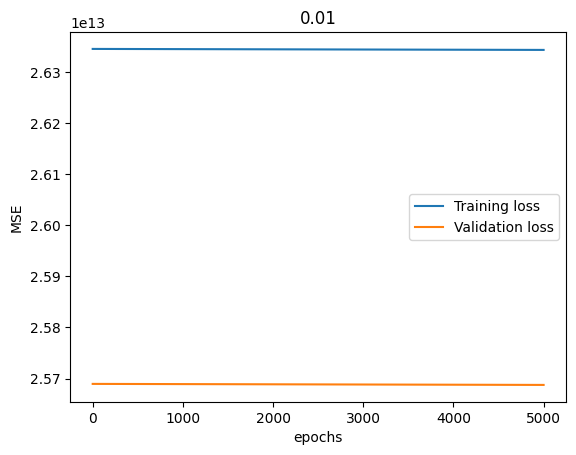

In [38]:
#try different learning rates

inputDim = 11          # dim of x
outputDim = 1         # dim of y
epochs = 5001

model = linearRegression(inputDim, outputDim)
criterion = torch.nn.MSELoss()


training_loss_history = []
validation_loss_history = []

#for lr in [0.0005, 0.001, 0.002, 0.005]: #learning rates for SGD
for lr in [0.01]:


  print('Learning rate:', lr)


  #optimizer = torch.optim.SGD(model.parameters(), lr=lr)
  optimizer = torch.optim.Adam(model.parameters(), lr=lr)

  for epoch in range(epochs):


    train_in = Variable(x_train)
    train_label = Variable(y_train)
    train_label = train_label.unsqueeze(1)

    val_in = Variable(x_val)
    val_label = Variable(y_val)
    val_label = val_label.unsqueeze(1)


    optimizer.zero_grad() #important
    train_pred = model(train_in)#predict
    loss = criterion(train_pred, train_label)#get train loss

    with torch.no_grad():
      val_pred = model(val_in)
      val_loss = criterion(val_pred, val_label)

    loss.backward()
    optimizer.step()


    #store loss and print
    training_loss_history.append(loss.item())#store loss
    validation_loss_history.append(val_loss.item())

    if epoch % 500 == 0: #report loss every 500 epochs
      print('Epoch %d, Training Loss %f, Validation Loss: %f' % (epoch, float(loss), float(val_loss)))



  print('\n')
  plt.plot(training_loss_history, label="Training loss")
  plt.plot(validation_loss_history, label="Validation loss")
  plt.xlabel("epochs")
  plt.ylabel("MSE")
  plt.legend()
  plt.title(lr)
  plt.show()

  training_loss_history.clear()
  validation_loss_history.clear()

